# 最大概似法(Maximum Likelihood Estimation, MLE)

## 常态分配的机率密度函数

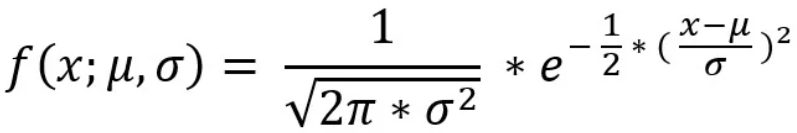

In [1]:
from IPython.display import Image
Image("./formula/Probability Density Function Of Normal Distribution.png")

## 范例1. 如果样本点x=1, 计算来自常态分配N(0,1)的机率

In [2]:
# 载入套件
import numpy as np
import math

# 常态分配的机率密度函数(Probability Density Function, pdf)
def f(x, mean, std):
    return (1/((2*np.pi*std**2) ** .5)) * np.exp(-0.5*((x-mean)/std)**2) 

f(1, 0, 1)

0.24197072451914337

In [3]:
from scipy.stats import norm

# 平均数(mean)、标准差(std)
mean = 0
std = 1

# 计算来自常态分配N(0,1)的机率
norm.pdf(1, mean, std)

0.24197072451914337

## 绘制机率密度函数(pdf)

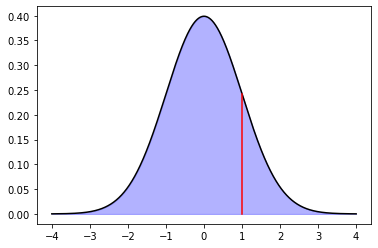

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 观察值范围
z1, z2 = -4, 4

# 平均数(mean)、标准差(std)
mean = 0
std = 1

# 样本点
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x, mean, std)

# 绘图
plt.plot(x,y,'black')

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')

plt.plot([1, 1], [0, norm.pdf(1, mean, std)], color='r')
plt.show()

## 范例2. 如果有两个样本点x=1、3, 计算来自常态分配N(1,1)及N(2,3)机率，哪一个可能性大?

In [5]:
# 载入套件
import numpy as np
import math
from scipy.stats import norm

# 计算来自常态分配 N(1,1)的机率
mean = 1   # 平均数(mean)
std = 1    # 标准差(std)
print(f'来自 N(1,1)的机率：{norm.pdf(1, mean, std) * norm.pdf(3, mean, std)}')


# 计算来自常态分配 N(2,3)的机率
mean = 2   # 平均数(mean)
std = 3    # 标准差(std)
print(f'来自 N(2,3)的机率：{norm.pdf(1, mean, std) * norm.pdf(3, mean, std)}')

来自 N(1,1)的机率：0.021539279301848634
来自 N(2,3)的机率：0.01582423339377573


## 范例3. 如果有一组样本, 计算来自哪一个常态分配N($\mu, \sigma$)，机率最大?

In [6]:
# 载入套件
from scipy.stats import norm
from sympy import symbols, pi, exp, log
from sympy.stats import Probability, Normal

# 样本
data = [1,3,5,3,4,2,5,6]

# x变数、平均数(m)、标准差(s)
x, m, s = symbols('x m s')

# 常态分配的机率密度函数(Probability Density Function, pdf)
pdf = (1/((2*pi*s**2) ** .5)) * exp(-0.5*((x-m)/s)**2) 
# 显示 log(pdf) 函数 
log_p = log(pdf)
log_p

log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(-m + x)**2/s**2))

In [7]:
# 带入样本资料
logP = 0
for xi in data:
    logP += log_p.subs({x: xi})
    
logP

log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(1 - m)**2/s**2)) + log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(2 - m)**2/s**2)) + 2*log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(3 - m)**2/s**2)) + log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(4 - m)**2/s**2)) + 2*log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(5 - m)**2/s**2)) + log(0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(6 - m)**2/s**2))

## 上述函数各对平均数、变异数偏微分 

In [8]:
from sympy import diff

logp_diff_m = diff(logP, m) # 对平均数(m)偏微分  

logp_diff_s = diff(logP, s) # 对变异数(s)偏微分

print('m 偏导数:', logp_diff_m)
print('s 偏导数:', logp_diff_s)

m 偏导数: -0.5*(2*m - 12)/s**2 - 1.0*(2*m - 10)/s**2 - 0.5*(2*m - 8)/s**2 - 1.0*(2*m - 6)/s**2 - 0.5*(2*m - 4)/s**2 - 0.5*(2*m - 2)/s**2
s 偏导数: 1.4142135623731*pi**0.5*(-0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(1 - m)**2/s**2)/s + 0.707106781186547*pi**(-0.5)*(1 - m)**2*(s**2)**(-0.5)*exp(-0.5*(1 - m)**2/s**2)/s**3)*(s**2)**0.5*exp(0.5*(1 - m)**2/s**2) + 1.4142135623731*pi**0.5*(-0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(2 - m)**2/s**2)/s + 0.707106781186547*pi**(-0.5)*(2 - m)**2*(s**2)**(-0.5)*exp(-0.5*(2 - m)**2/s**2)/s**3)*(s**2)**0.5*exp(0.5*(2 - m)**2/s**2) + 2.82842712474619*pi**0.5*(-0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(3 - m)**2/s**2)/s + 0.707106781186547*pi**(-0.5)*(3 - m)**2*(s**2)**(-0.5)*exp(-0.5*(3 - m)**2/s**2)/s**3)*(s**2)**0.5*exp(0.5*(3 - m)**2/s**2) + 1.4142135623731*pi**0.5*(-0.707106781186547*pi**(-0.5)*(s**2)**(-0.5)*exp(-0.5*(4 - m)**2/s**2)/s + 0.707106781186547*pi**(-0.5)*(4 - m)**2*(s**2)**(-0.5)*exp(-0.5*(4 - m)**2/s**2)

## 简化偏导数

In [9]:
from sympy import simplify

# 简化 m 偏导数
logp_diff_m = simplify(logp_diff_m)
print(logp_diff_m)
print()

# 简化 s 偏导数
logp_diff_s = simplify(logp_diff_s)
logp_diff_s

(29.0 - 8.0*m)/s**2



(8.0*m**2 - 58.0*m - 8.0*s**2 + 125.0)/s**3

## 令一阶导数=0，有最大值，可得到联立方程式

In [10]:
from sympy import solve

funcs = [logp_diff_s, logp_diff_m]
solve(funcs, [m, s])

[(3.62500000000000, -1.57619002661481), (3.62500000000000, 1.57619002661481)]

## 使用NumPy验证

In [11]:
np.mean(data), np.std(data)

(3.625, 1.5761900266148114)